# Investigation of taxi tipping behavior with income

The NYC taxi data is publicly accessible since 2009. There are, consequently, many data-driven studies, time series analyses, geospatial analyses, and a commonly attempted task is the prediction of the amount tipped. Many of these studies suggest a relation between the socioeconomic characteristics of the passenger and their tipping habits. This analysis is designed to test the hypothesis that the income of the passenger is related to the passenger tipping behavior (tipping generosity).

**First hint: the data download may take some time - it took 9 minutes for me on my laptop a couple of days ago! Start downloading the data right away, then go back to the rest of the instructions. **

# Objective: relate the yellow taxi tips to passenger income.

## 1-5 are the data wrangling portion of the exercise, and are worth 50% of the points
### In the data wrangling portion points are awarded for data processed so that they support the analysis in parts 5-10. This portion is likely going to be the most consuming.

## 6-11 are the analysis portion of the exercise, and are worth 60% of the points 
### In the data analysis portion points are awarded for correct analysis, conclusions supported by the analysis *and expressed in full sentences*, and plots that support the analysis and conclusions.

#### That sums up to 110%, so you have a better chance to get 100% on your test, and if you exceed 100% the rest will be accounted for as extra credit and help your cumulative score at the end of the semester.

## Data Wrangling (each task is 10% of the points)
### 1. Download yellowcab data from 2009 and subsample it to reduce it to a manageable size ([alternatives](https://docs.google.com/document/d/1QRXSMJdu-iP1967GbRxtZXGChVDVQ5WNVImn1j4hCl8/edit?usp=sharing)) 
### 2. Download income information from IRS for NYC and extract the income per person by zipcode ([alternatives](https://docs.google.com/document/d/1QRXSMJdu-iP1967GbRxtZXGChVDVQ5WNVImn1j4hCl8/edit?usp=sharing))
### 3. Feature engineering task: extract the trip duration from the data and the tip percentage  ([alternatives](https://docs.google.com/document/d/1QRXSMJdu-iP1967GbRxtZXGChVDVQ5WNVImn1j4hCl8/edit?usp=sharing))
### 4. Find the zipcodes of taxi rides origin and destination 
### 5. Data aggregation task: Join the datasets so that your data contains at least: trip duration, trip distance, fare amount, tip percentage, departure zipcode income, and destination zipcode income. 

## Analysis


### 6. Plot the distribution of tip percentages and *report its first and second moment*. Remove outliers, replot and see if the moments changed significantly. 

### 7. Test if the distribution is consistent with a Gaussian.

### 8. Fit a line to taxi fare vs trip duration and to taxi fare vs trip distance to decide which variable between duration and distance *contains more information when used in a model in conjunction with the fare*.

### 9. Improve the fit by removing ''suspected'' outliers and *quantify* the improvement

### 10. Create a multivariate liner model to predict the tip percentage as a function of trip fare and another variable, the one you chose in step 8. Create also a linear model to predict the tip percentage as a multivariate linear model with variables trip duration or distance and trip fare, and  also includes  income (by zipcode) at arrival and destination. 

### 11 Compare the two models in step 10 *formally*. Which is a better model? Finally,  create two mode models,  one with duration/distance,  fare and income at departure, one with duration/distance,  fare and income at destination. Which is better? Why? 



## 1. Download yellowtaxi data for February 2009. (10%)
Data can be accessed through [this link](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml). 

Note that the file is large, and will take some time to read! (Start the download right away and then go back to the instructions). If you need help [refer to this](https://docs.google.com/document/d/1-ets-S4KETuKQDSua-XSkwqRtsza-o6hSz_U5k_cQRo/edit?usp=sharing). 

Very important! this dataset is large! 13 million rows!  10,000 rows or so is plenty to write your code for this mitderm. ** [hint](https://docs.google.com/document/d/1vivVDYtdAT96_AMIMCXM7P93Ayb876BaIh55YP-UUCQ/edit?usp=sharing) about large data **`

Subsample the way I did by taking every 1,000th row if you want to use the preprocessed datasets I prepared at any point (especially for the origin destination zipcode of each ride as you will **need to** unless you are handy with geopandas or you have access to premium google map API that allows >2,500 queries)

**OR  **([alternative 1](https://docs.google.com/document/d/1QRXSMJdu-iP1967GbRxtZXGChVDVQ5WNVImn1j4hCl8/edit?usp=sharing))


In [1]:
# This is the Program to study Correlation between taxi tip percentages and Income in the neighborhood.
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader

%pylab inline

import scipy.stats
import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#set this to true while deeloping to subsample data

DEVELOPING = True

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [2]:
# Downloading the Yellow Taxi Data for the month of February 2009
os.system("curl -O https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2009-02.csv")
os.system("mv " + "yellow_tripdata_2009-02.csv " + os.getenv("PUIDATA"))


0

In [3]:
yc200902 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'yellow_tripdata_2009-02.csv')
yc200902.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,DDS,2009-02-03 08:25:00,2009-02-03 08:33:39,1,1.60,-73.992768,40.758325,NaN,NaN,-73.994710,40.739723,CASH,6.9,0.0,NaN,0.0,0.0,6.9
1,VTS,2009-02-28 00:26:00,2009-02-28 00:40:00,5,3.05,0.000000,0.000000,NaN,NaN,0.000000,0.000000,CASH,10.5,0.5,NaN,0.0,0.0,11.0
2,DDS,2009-02-22 00:39:23,2009-02-22 00:45:52,1,1.50,-73.137393,41.366138,NaN,NaN,-73.137393,41.366138,CASH,5.7,0.5,NaN,0.0,0.0,6.2
3,VTS,2009-02-28 12:47:00,2009-02-28 12:54:00,1,1.42,-73.980458,40.748445,NaN,NaN,-73.996103,40.737095,CASH,6.1,0.0,NaN,0.0,0.0,6.1
4,DDS,2009-02-05 18:34:35,2009-02-05 18:43:26,1,1.50,-73.137393,41.366138,NaN,NaN,-73.137393,41.366138,CASH,6.9,1.0,NaN,0.0,0.0,7.9


In [4]:
# Selecting every 1000th Sample
if DEVELOPING:
    yc200902 = yc200902[::1000]

In [5]:
yc200902.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,DDS,2009-02-03 08:25:00,2009-02-03 08:33:39,1,1.60,-73.992768,40.758325,NaN,NaN,-73.994710,40.739723,CASH,6.9,0.0,NaN,0.00,0.0,6.90
1000,VTS,2009-02-11 23:03:00,2009-02-11 23:29:00,1,11.95,-73.968478,40.760553,NaN,NaN,-73.972788,40.637433,CASH,28.5,0.5,NaN,0.00,0.0,29.00
2000,VTS,2009-02-28 07:22:00,2009-02-28 07:32:00,3,2.86,-73.986690,40.726995,NaN,NaN,-73.988673,40.755612,CASH,9.3,0.0,NaN,0.00,0.0,9.30
3000,VTS,2009-02-14 17:02:00,2009-02-14 17:22:00,4,4.60,-73.991188,40.723345,NaN,NaN,-73.946650,40.776628,Credit,14.9,0.0,NaN,2.00,0.0,16.90
4000,CMT,2009-02-08 11:54:51,2009-02-08 12:06:43,1,2.40,-73.980833,40.744672,NaN,NaN,-73.984400,40.718905,Credit,9.3,0.0,NaN,1.39,0.0,10.69


In [6]:
yc200902.columns

Index(['vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
       'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
       'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
       'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt',
       'Total_Amt'],
      dtype='object')

In [7]:
yc200902.shape

(13381, 18)

In [8]:
# Filtering the Columns
yc200902_t = yc200902 [['Trip_Pickup_DateTime','Trip_Dropoff_DateTime', 'Passenger_Count', 'Trip_Distance',
       'Start_Lon', 'Start_Lat', 'End_Lon','End_Lat','Tip_Amt','Total_Amt']]

In [9]:
yc200902_t.shape

(13381, 10)

In [10]:
yc200902_t['Trip_Pickup_DateTime'] = pd.to_datetime(yc200902_t.Trip_Pickup_DateTime)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
yc200902_t['Trip_Dropoff_DateTime'] = pd.to_datetime(yc200902_t.Trip_Dropoff_DateTime)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
yc200902_t['Trip_Duration'] = yc200902_t.Trip_Dropoff_DateTime - yc200902_t.Trip_Pickup_DateTime

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
yc200902_t.head()

,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Trip_Duration
0,2009-02-03 08:25:00,2009-02-03 08:33:39,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.00,6.90,00:08:39
1000,2009-02-11 23:03:00,2009-02-11 23:29:00,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.00,29.00,00:26:00
2000,2009-02-28 07:22:00,2009-02-28 07:32:00,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.00,9.30,00:10:00
3000,2009-02-14 17:02:00,2009-02-14 17:22:00,4,4.60,-73.991188,40.723345,-73.946650,40.776628,2.00,16.90,00:20:00
4000,2009-02-08 11:54:51,2009-02-08 12:06:43,1,2.40,-73.980833,40.744672,-73.984400,40.718905,1.39,10.69,00:11:52


In [14]:
yc200902_t['Trip_Duration'] = yc200902_t['Trip_Duration'].dt.total_seconds()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
yc200902_t.head()

,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Trip_Duration
0,2009-02-03 08:25:00,2009-02-03 08:33:39,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.00,6.90,519.0
1000,2009-02-11 23:03:00,2009-02-11 23:29:00,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.00,29.00,1560.0
2000,2009-02-28 07:22:00,2009-02-28 07:32:00,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.00,9.30,600.0
3000,2009-02-14 17:02:00,2009-02-14 17:22:00,4,4.60,-73.991188,40.723345,-73.946650,40.776628,2.00,16.90,1200.0
4000,2009-02-08 11:54:51,2009-02-08 12:06:43,1,2.40,-73.980833,40.744672,-73.984400,40.718905,1.39,10.69,712.0


In [16]:
yc200902_t.describe()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Trip_Duration
count,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000
mean,1.678499,2.618311,-72.969525,40.198913,-72.990477,40.210496,0.504281,10.494994,680.274195
std,1.256401,2.931403,8.569052,4.720881,8.475509,4.669382,1.329521,8.170102,939.256642
min,1.000000,0.000000,-76.335577,-0.000008,-76.328702,-0.000008,0.000000,2.500000,-10200.000000
25%,1.000000,1.000000,-73.991768,40.736663,-73.991368,40.734965,0.000000,6.000000,359.000000
50%,1.000000,1.690000,-73.981639,40.753456,-73.980237,40.753574,0.000000,8.100000,540.000000
75%,2.000000,3.000000,-73.967938,40.767967,-73.964626,40.768765,0.000000,11.800000,869.000000
max,6.000000,31.430000,0.000017,45.338912,0.000017,45.338912,45.000000,131.660000,86340.000000


In [17]:
yc200902_t.columns

Index(['Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime', 'Passenger_Count',
       'Trip_Distance', 'Start_Lon', 'Start_Lat', 'End_Lon', 'End_Lat',
       'Tip_Amt', 'Total_Amt', 'Trip_Duration'],
      dtype='object')

In [18]:
yc200902_short = yc200902_t [['Passenger_Count', 'Trip_Distance',
       'Start_Lon', 'Start_Lat', 'End_Lon','End_Lat','Tip_Amt','Total_Amt', 'Trip_Duration' ]]

In [19]:
yc200902_short.shape

(13381, 9)

At this point your file should look something like this. If you read in the file in the shortcuts you will also have a column "Unnamed: 0". You should consider setting that as the index if you have not done so yet.

In [20]:
yc200902_short.head()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Trip_Duration
0,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.00,6.90,519.0
1000,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.00,29.00,1560.0
2000,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.00,9.30,600.0
3000,4,4.60,-73.991188,40.723345,-73.946650,40.776628,2.00,16.90,1200.0
4000,1,2.40,-73.980833,40.744672,-73.984400,40.718905,1.39,10.69,712.0


(Here you may want to drop columns you will not need, but make sure you read all the instructions carefully to know which variables you will need before dropping them, and possibly save a copy of this short dataset to your disk.)

In [21]:
yc200902_short.shape

(13381, 9)

## 2. Downloading income data by zipcode 

In this task you should figure out how to extract income data from the IRS (internal revenue service, i.e. taxes). This is a tricky data processing task, but keep in mind you can use the file I provided and come back to this at the end if all goes well. 

Find income data : you can find it in this IRS file http://www.nber.org/tax-stats/zipcode/2009/09zp33ny.xls (the IRS website hosts more recent datasets, with identical format, but no longer hosts data as far back as 2009). You can use the function I saved in readIncomeXls.py as reader to get the file from [this link](http://bit.ly/2li1N7q).

Use the *Adjusted gross income* for every zipcode. Additionally identify the columns indicating the number of returns, the number of dependents, the number of joint returns. Together they indicate the size of the family that filed that report, and allow you to obtain the **income per person** from the income of the whole zipcode.
You should also convert the zip code to numeric values (with pd.to_numeric for example, or with a list comprehension [int(z)  for z in zipcode])

For every zipcode the adjusted median income is the first valid row associated with that zipcode.


Create a new dataframe zipincome with the value of income per zipcode, and income per person (per capita, PC) 
**OR ([alternative 2](https://docs.google.com/document/d/1QRXSMJdu-iP1967GbRxtZXGChVDVQ5WNVImn1j4hCl8/edit?usp=sharing))**

In [22]:
os.system("curl -O http://www.nber.org/tax-stats/zipcode/2009/09zp33ny.xls ")
os.system("mv " + "09zp33ny.xls " + os.getenv("PUIDATA"))

0

In [23]:
def readIncomeXls(url):
    return pd.read_excel(url, header=3, index_col="ZIP\ncode [1]")

In [24]:
# Downloading the Income file from the url
zipincome = readIncomeXls('http://www.nber.org/tax-stats/zipcode/2009/09zp33ny.xls')

In [25]:
zipincome.head()

,Size of adjusted gross income,Number of returns,Number of joint returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Adjusted gross income (AGI),Salaries and wages in AGI,Unnamed: 9,Taxable interest,...,Alternative minimum tax,Unnamed: 62,Income tax [6],Unnamed: 64,Total tax liability [7],Unnamed: 66,Tax due at time of filing [8],Unnamed: 68,Overpayments refunded [9],Unnamed: 70
ZIP code [1],,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number of returns,Amount,Number of returns,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
NaN,NaN,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7,-8,-9,...,-60,-61,-62,-63,-64,-65,-66,-67,-68,-69
0,NaN,8859870.0,2885809.0,5831350.0,16840512.0,5270429.0,591058301.0,7279318,414308145,4100213,...,466119,3476047,5964627,81598109,6641628,85640574,1419456,5803715,6896726,23044299
0,"$1 under $25,000",3555603.0,496249.0,2241627.0,5286324.0,1551565.0,42351360.0,2519194,29460761,955184,...,874,601,1174529,766535,1749990,1615697,449035,258237,2784252,6008426
0,"$25,000 under $50,000",2107465.0,501518.0,1342830.0,3897170.0,1195917.0,76646332.0,1865259,63488214,817330,...,734,1209,1684304,4328850,1762100,4769972,251980,354726,1809800,5077936


In [26]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/zipincome.json ")
os.system("mv " + "zipincome.json " + os.getenv("PUIDATA"))

0

In [27]:
# pd.to_numeric(zipincome['zipincome.ZIP code [1]'], errors='coerce').astype(int)

In [28]:
#incomeByZip.head()

In [29]:
#print ("Adjusted gross income (AGI)  for zipcode 10001:", 
       #incomeByZip.loc[[10001]]["Adjusted gross income (AGI)"].iloc[0])

In [30]:
# Reading from the JSON File
zipincome = pd.read_json(os.getenv("PUIDATA") + "/" + 'zipincome.json')

In [31]:
zipincome.head()

,POPULATION,ZIPCODE,incomePC
0,17016108,0,34.735223
1,17426,10001,94.386319
10,40152,10011,121.765217
100,2050,10526,62.539512
1000,1478,13335,19.930311


the zip codes series should look like this, and may contain some spurious values (0, 99999), but should you worry about those??

In [32]:
zipincome.ZIPCODE[:10]

0           0
1       10001
10      10011
100     10526
1000    13335
1001    13337
1002    13338
1003    13339
1004    13340
1005    13342
Name: ZIPCODE, dtype: int64

## 3. Feature engineering task: extract the trip duration from the data and tip percentage

I recommend you create a trip duration column where the duration is in hours. That is a reasonable unit, such that most trips will be near unit value. The pandas datetime package documentation may be helpful here, particularly the [time delta](https://pandas.pydata.org/pandas-docs/stable/timedeltas.html).
 
** OR ([alternative 3](https://docs.google.com/document/d/1QRXSMJdu-iP1967GbRxtZXGChVDVQ5WNVImn1j4hCl8/edit?usp=sharing)) **

In [33]:
yc200902_short['tripDurationHours'] = yc200902_short['Trip_Duration'].astype(float)/3600.0

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
yc200902_short.head()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Trip_Duration,tripDurationHours
0,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.00,6.90,519.0,0.144167
1000,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.00,29.00,1560.0,0.433333
2000,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.00,9.30,600.0,0.166667
3000,4,4.60,-73.991188,40.723345,-73.946650,40.776628,2.00,16.90,1200.0,0.333333
4000,1,2.40,-73.980833,40.744672,-73.984400,40.718905,1.39,10.69,712.0,0.197778


In [35]:
yc200902_short['tripDurationHours'] = yc200902_short['tripDurationHours'].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
yc200902_short.tripDurationHours.head()

0       0.144167
1000    0.433333
2000    0.166667
3000    0.333333
4000    0.197778
Name: tripDurationHours, dtype: float64

In [37]:
yc200902_short['tipPC'] = yc200902_short.Tip_Amt/yc200902_short.Total_Amt

In [38]:
yc200902_short.tipPC.head()

0       0.000000
1000    0.000000
2000    0.000000
3000    0.118343
4000    0.130028
Name: tipPC, dtype: float64

In [39]:
yc200902_short.head()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Tip_Amt,Total_Amt,Trip_Duration,tripDurationHours,tipPC
0,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.00,6.90,519.0,0.144167,0.000000
1000,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.00,29.00,1560.0,0.433333,0.000000
2000,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.00,9.30,600.0,0.166667,0.000000
3000,4,4.60,-73.991188,40.723345,-73.946650,40.776628,2.00,16.90,1200.0,0.333333,0.118343
4000,1,2.40,-73.980833,40.744672,-73.984400,40.718905,1.39,10.69,712.0,0.197778,0.130028


## 4. Find the departure and destination zipcode of every ride
You can download the files I prepared (no points loss!). 
There is still some data wrangling: the data files I provided are at the [same link](http://cosmo.nyu.edu/~fb55/data/), and are named departureZIP.csv and destinationZIP.csv. Those files contain the zipcode of the departure and destination coordinates respectively for all rides with valid NYC departure/destination coordinates for the subsampled dataset, sampled by choosing every 1000th row. If you chose a different subsampling strategy then will need to find the zipcodes with one of the methods below.


**Alternatively:**

If you are handy with goepandas you can to a spatial joint with [this file](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=0ahUKEwj289ntl4vXAhVLKyYKHTnBCPoQFggoMAA&url=https%3A%2F%2Fdata.cityofnewyork.us%2FBusiness%2FZip-Code-Boundaries%2Fi8iw-xf4u&usg=AOvVaw0SKZTHDFVpjcyAMZOy0lDx) which is what I did, but you will lose no points if you just download and merge my data files.[Some help on this](https://docs.google.com/document/d/1F3QUlX6krQmwx_YONa41ETa-Tsq1l01creBDBqzzP6w/edit?usp=sharing)

**Alternatively:**

You can use the google API to [reverse geocode the coordinates](https://docs.google.com/document/d/1LWQd3ZJsDftx8RA5cT_dVlIKH2PJ7LaI2OIXBJmURjE/edit?usp=sharing) including the long and latitide of each ride, but unless you have a premium account you will hit the API limit. You have a limit of 2,500 requests/day. 

## 5. Data aggregation task: Join the datasets so that your data contains at least: trip duration, trip distance, fare amount, tip percentage, departure zipcode income, and destination zipcode income

## Here I tried to merge using the Lat/Long instead of the Unnamed:0 Column. I got the logic right but I did not have enough time to go back and rerun the code as I dropped the Column.

In [40]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/departureZIP.csv ")
os.system("mv " + "departureZIP.csv " + os.getenv("PUIDATA"))

0

In [41]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/destinationZIP.csv ")
os.system("mv " + "destinationZIP.csv " + os.getenv("PUIDATA"))

0

In [42]:
depzip = pd.read_csv(os.getenv("PUIDATA") + "/" + 'departureZIP.csv')
depzip.drop(['Unnamed: 0','End_Lon', 'End_Lat','lonlat'],axis=1, inplace=True)
depzip.head()


,Start_Lon,Start_Lat,ZIPCODE
0,-73.992768,40.758325,10036
1,-73.985048,40.755035,10036
2,-73.989672,40.756602,10036
3,-73.988487,40.757317,10036
4,-73.984228,40.759523,10036


In [43]:
destzip = pd.read_csv(os.getenv("PUIDATA") + "/" + 'destinationZIP.csv')
destzip.drop(['Unnamed: 0','Start_Lon', 'Start_Lat','lonlat'],axis=1, inplace=True)

destzip.head()

,End_Lon,End_Lat,ZIPCODE
0,-73.994710,40.739723,10011
1,-73.997600,40.737661,10011
2,-73.995922,40.733203,10011
3,-74.000598,40.742468,10011
4,-73.997386,40.738333,10011


In [44]:
yc200902_short.columns

Index(['Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat', 'End_Lon',
       'End_Lat', 'Tip_Amt', 'Total_Amt', 'Trip_Duration', 'tripDurationHours',
       'tipPC'],
      dtype='object')

In [45]:
yc200902_short_1 = yc200902_short [['Passenger_Count', 'Trip_Distance','Start_Lon', 'Start_Lat', 'End_Lon',
       'End_Lat','tripDurationHours','tipPC']]

In [46]:
yc200902_short_1.head()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,tripDurationHours,tipPC
0,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.144167,0.000000
1000,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.433333,0.000000
2000,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.166667,0.000000
3000,4,4.60,-73.991188,40.723345,-73.946650,40.776628,0.333333,0.118343
4000,1,2.40,-73.980833,40.744672,-73.984400,40.718905,0.197778,0.130028


In [47]:
yc200902_shortcut_1 = pd.merge(yc200902_short_1, depzip, on=['Start_Lon','Start_Lat'], left_index=True, right_index=True)

yc200902_shortcut_1.head()

,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,tripDurationHours,tipPC,ZIPCODE
0,1,1.60,-73.992768,40.758325,-73.994710,40.739723,0.144167,0.000000,10036
1000,1,11.95,-73.968478,40.760553,-73.972788,40.637433,0.433333,0.000000,10022
2000,3,2.86,-73.986690,40.726995,-73.988673,40.755612,0.166667,0.000000,10003
3000,4,4.60,-73.991188,40.723345,-73.946650,40.776628,0.333333,0.118343,10016
4000,1,2.40,-73.980833,40.744672,-73.984400,40.718905,0.197778,0.130028,10009


In [48]:
# Finally Merging the Lat_Long with the Dest Zip
yc200902_shortcut_2 = pd.merge(yc200902_shortcut_1, destzip, on=['End_Lon','End_Lat'], left_index=True, right_index=True)

In [49]:
yc200902_shortcut_2.columns

Index(['Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat', 'End_Lon',
       'End_Lat', 'tripDurationHours', 'tipPC', 'ZIPCODE_x', 'ZIPCODE_y'],
      dtype='object')

# ANALYSIS PORTION remember to make plots and describe your findings with complete sentences, *especially* the weaknesses of your analysis!

In [50]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/yc200902_income_final.csv")
os.system("mv " + "yc200902_income_final.csv " + os.getenv("PUIDATA"))


0

In [51]:
ycfinal = pd.read_csv(os.getenv("PUIDATA") + "/" + 'yc200902_income_final.csv')
ycfinal.head()

,Unnamed: 0,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,tripDurationHours,tipPC,ZIPCODE_dep,ZIPCODE_des,income_departure,income_destination,Trip_Distance
0,0,6.9,0.0,NaN,0.0,0.0,6.9,0.144167,0.0,10036,10011,120.643519,121.765217,1.60
1,1,6.9,0.0,NaN,0.0,0.0,6.9,0.199444,0.0,10036,10011,120.643519,121.765217,1.70
2,2,9.9,0.0,NaN,0.0,0.0,9.9,0.197222,0.0,10036,10011,120.643519,121.765217,2.30
3,3,7.3,0.0,NaN,0.0,0.0,7.3,0.150000,0.0,10036,10011,120.643519,121.765217,1.85
4,4,5.7,0.5,NaN,0.0,0.0,6.2,0.100000,0.0,10036,10011,120.643519,121.765217,1.37


In [52]:
ycfinal.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Unnamed: 0,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,tripDurationHours,tipPC,ZIPCODE_dep,ZIPCODE_des,income_departure,income_destination,Trip_Distance
count,12253.000000,12253.000000,12253.000000,0.0,12253.000000,12253.000000,12253.000000,12253.000000,12253.000000,12253.000000,12253.000000,12253.000000,12253.000000,12253.000000
mean,6126.000000,9.249168,0.185302,NaN,0.465168,0.051938,9.955879,0.184321,0.048353,10075.033951,10125.507386,140.614077,135.066641,2.442429
std,3537.280759,6.425502,0.321453,NaN,1.203072,0.483253,7.146610,0.263452,0.151701,250.184172,335.458531,67.457681,72.409097,2.696968
min,0.000000,2.500000,0.000000,NaN,0.000000,0.000000,2.500000,-0.933333,0.000000,10001.000000,10001.000000,12.070212,12.070212,0.000000
25%,3063.000000,5.700000,0.000000,NaN,0.000000,0.000000,5.900000,0.096667,0.000000,10011.000000,10011.000000,111.452011,94.386319,1.000000
50%,6126.000000,7.400000,0.000000,NaN,0.000000,0.000000,8.050000,0.150000,0.000000,10018.000000,10019.000000,136.763861,121.765217,1.600000
75%,9189.000000,10.600000,0.500000,NaN,0.000000,0.000000,11.400000,0.233333,0.000000,10025.000000,10028.000000,170.259993,170.259993,2.860000
max,12252.000000,68.900000,1.000000,NaN,45.000000,12.450000,71.700000,23.983333,9.000000,11436.000000,11692.000000,430.402252,430.402252,31.430000


Text(0.5,1,'Original plot')

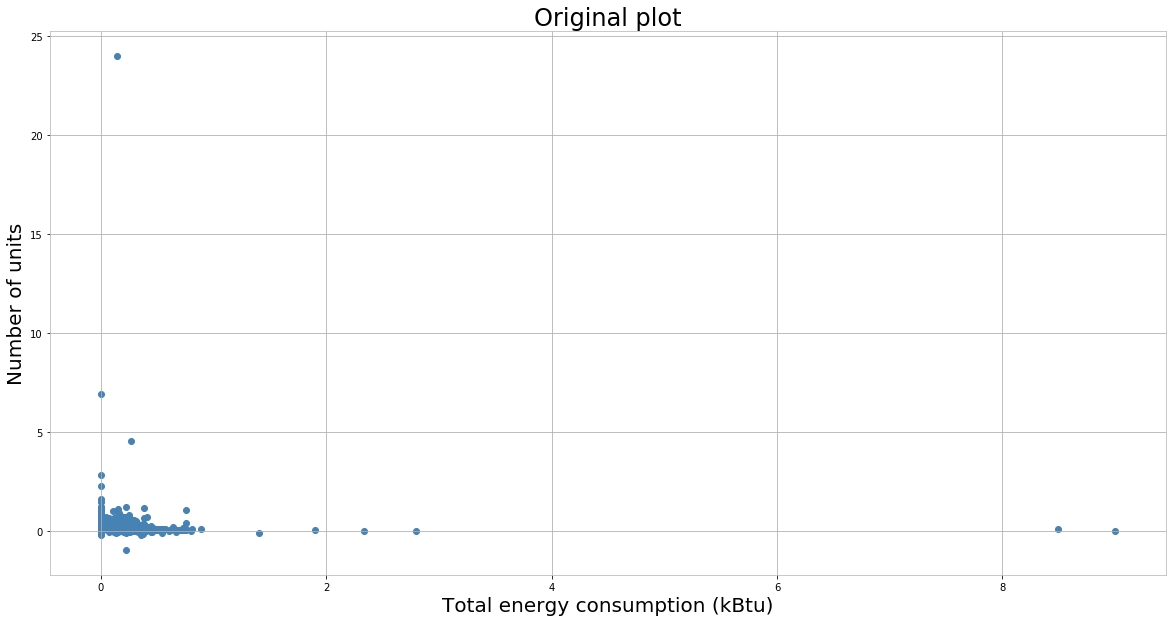

In [53]:
fig = pl.figure(figsize=(20,10))
fig.add_subplot(111)
pl.scatter(ycfinal['tipPC'], ycfinal['tripDurationHours'])
pl.xlabel('Total energy consumption (kBtu)', fontsize=20)
pl.ylabel('Number of units', fontsize=20)
pl.title('Original plot', fontsize = 24)


In [54]:
ycfinalCut = ycfinal[(ycfinal.tripDurationHours < 2) * (ycfinal.tipPC < 1)* (ycfinal.Trip_Distance < 15)* (ycfinal.Trip_Distance < 15)]

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [55]:
ycfinalCut.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,Unnamed: 0,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt,tripDurationHours,tipPC,ZIPCODE_dep,ZIPCODE_des,income_departure,income_destination,Trip_Distance
count,12085.000000,12085.000000,12085.000000,0.0,12085.000000,12085.000000,12085.000000,12085.000000,12085.000000,12085.000000,12085.000000,12085.000000,12085.000000,12085.000000
mean,6086.736036,8.799996,0.186595,NaN,0.428677,0.023724,9.443355,0.175342,0.046054,10066.050807,10116.062557,141.320260,135.939105,2.234210
std,3521.103458,5.078538,0.322233,NaN,0.984110,0.323441,5.571100,0.118562,0.095844,225.384626,319.167653,66.965255,72.040320,1.979161
min,0.000000,2.500000,0.000000,NaN,0.000000,0.000000,2.500000,-0.933333,0.000000,10001.000000,10001.000000,12.070212,12.070212,0.000000
25%,3043.000000,5.500000,0.000000,NaN,0.000000,0.000000,5.900000,0.095278,0.000000,10011.000000,10011.000000,111.452011,95.103886,0.990000
50%,6079.000000,7.300000,0.000000,NaN,0.000000,0.000000,7.900000,0.150000,0.000000,10018.000000,10019.000000,136.763861,121.765217,1.600000
75%,9115.000000,10.500000,0.500000,NaN,0.000000,0.000000,11.300000,0.233333,0.000000,10024.000000,10028.000000,170.259993,170.259993,2.800000
max,12252.000000,56.100000,1.000000,NaN,20.000000,10.000000,65.000000,1.633611,0.888889,11436.000000,11436.000000,430.402252,430.402252,14.900000


## 6. Plot the distribution of tip percentages and describe its first and second *moment*.    
Remove outliers if needed, replot and see if the moments changed significantly.

##  7.   Test if the distribution is consistent with a Gaussian

you have done this  several times, for example in HW 5 assignment 2

In [56]:
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

Text(0.5,1,'Gaussian Fit')

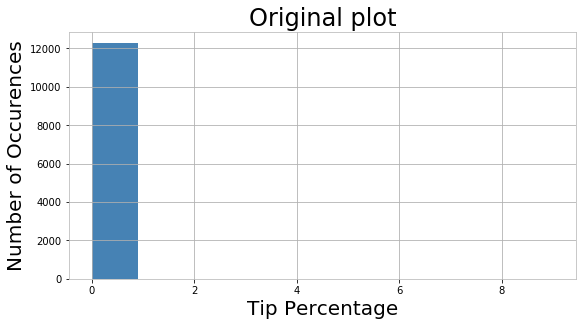

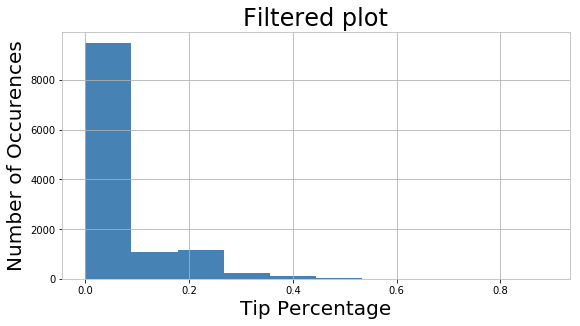

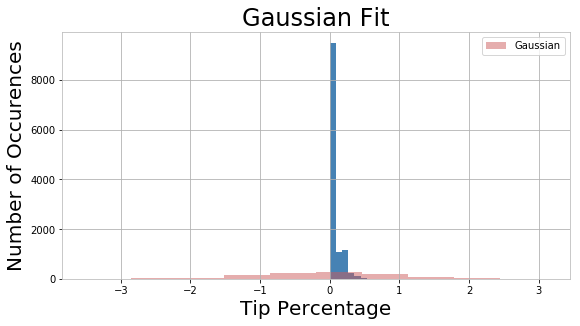

In [57]:
fig = pl.figure(figsize=(20,10))
fig.add_subplot(221)
pl.hist(ycfinal['tipPC'])
pl.xlabel('Tip Percentage', fontsize=20)
pl.ylabel('Number of Occurences', fontsize=20)
pl.title('Original plot', fontsize = 24)

fig = pl.figure(figsize=(20,10))
fig.add_subplot(222)
pl.hist(ycfinalCut['tipPC'])
pl.legend()
pl.xlabel('Tip Percentage', fontsize=20)
pl.ylabel('Number of Occurences', fontsize=20)
pl.title('Filtered plot', fontsize = 24)


fig = pl.figure(figsize=(20,10))
fig.add_subplot(223)
pl.hist(ycfinalCut['tipPC'])
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.xlabel('Tip Percentage', fontsize=20)
pl.ylabel('Number of Occurences', fontsize=20)
pl.title('Gaussian Fit', fontsize = 24)

## 8.  Fit a line to taxi fare vs trip duration and to taxi fare vs trip distance to decide which variable between duration and distance "contains more information" when used with the fare.

In the last step of the exercise you will model the *Tip Percentage* (endogenous variable) as a function of *Fare Amount* **and another variable** in a multivariate regression. In this step you will chose which variable you will include in that model. You can chose **trip duration** or **trip distance** as your second variable. Plot Fare Amount against each. Which of the two will be more useful in your multivariate model? Justify your answer. 

## 9. Remove outliers and assess if this has an effect this has on the model

If appropriate (if there are obvious outliers) remove them and assess how that changes the model's predictive power: has the variance described by your model improved or not?

Text(0.5,1,'Filtered plot')

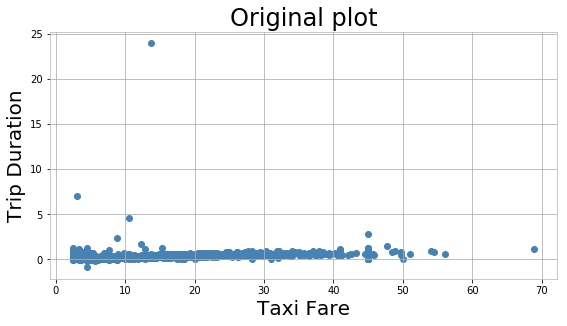

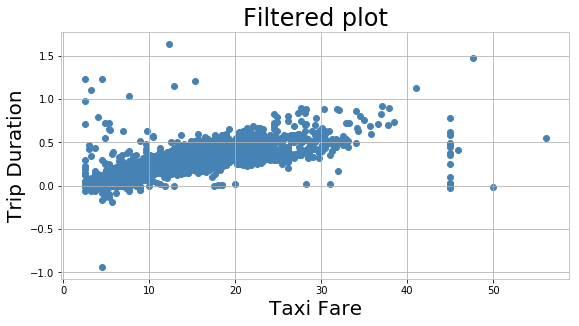

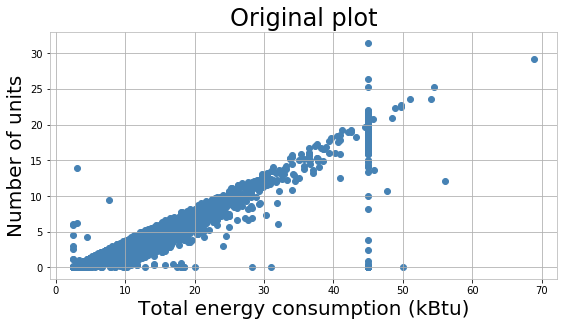

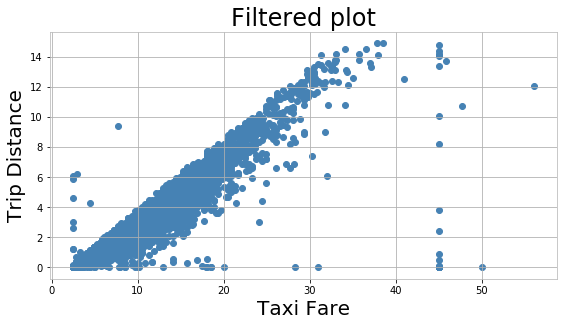

In [58]:
fig = pl.figure(figsize=(20,10))
fig.add_subplot(221)
pl.scatter(ycfinal['Fare_Amt'], ycfinal['tripDurationHours'])
pl.xlabel('Taxi Fare', fontsize=20)
pl.ylabel('Trip Duration', fontsize=20)
pl.title('Original plot', fontsize = 24)

fig = pl.figure(figsize=(20,10))
fig.add_subplot(222)
pl.scatter(ycfinalCut['Fare_Amt'], ycfinalCut['tripDurationHours'])
pl.xlabel('Taxi Fare', fontsize=20)
pl.ylabel('Trip Duration', fontsize=20)
pl.title('Filtered plot', fontsize = 24)

fig = pl.figure(figsize=(20,10))
fig.add_subplot(223)
pl.scatter(ycfinal['Fare_Amt'], ycfinal['Trip_Distance'])
pl.xlabel('Total energy consumption (kBtu)', fontsize=20)
pl.ylabel('Number of units', fontsize=20)
pl.title('Original plot', fontsize = 24)

fig = pl.figure(figsize=(20,10))
fig.add_subplot(224)
pl.scatter(ycfinalCut['Fare_Amt'], ycfinalCut['Trip_Distance'])
pl.xlabel('Taxi Fare', fontsize=20)
pl.ylabel('Trip Distance', fontsize=20)
pl.title('Filtered plot', fontsize = 24)

You have fitted lines and curves in multiple HWs and labs: HW5, HW6, Lab5, Lab6. If you do it with statsmodels you get a variety of diagnostics with the .summary() method. In this case you just want to see which is the *more predictive* model. (why?)

## 10.  Create two multivariate linear model to predict the tip percentage 
(Note: in class and in the HW you did linear models and quadratic models. A multivariate linear model is simply a linear model of multiple variables: y = ax + bz as opposed to y = ax 
With the formula package of slm it is easy to write a multivariate regression: just add each variable in the formula: "y ~ x + z")

Your first model should have variables: trip fare amount, and one other, whichever you decide is best between trip duration and trip distance in step 8. 

Your second model should include the same exogenous variables, and also income at departure (income per person by zipcode) and at destination.

## 11.  Compare multivariate linear model to predict the tip percentage and assess importance of socioeconomic variables
Give a **rigorous answer** to the question: is the restricted model (only fare and duration/distance) better or worse than the complex model that includes income at departure at destination?  

What about a model that contains only one income (at departure or destination)? Create the last two models, with duration/distance and fare and only one of the 2 incomes as exogenous variables. Is either of the model that includes the income (either median income at departure or median income at destination address) a better model than the restricted one that only includes fare amount and trip duration/distance? Which of those two latest models is better? You can answer all these questions rigorously (i.e. with p-values).

**What does this mean about our original question??**

### The Data Correlation has not been established however the intemediate results can be observed. A Clear path has been set forward to establish the relationship of the problem however due to insufficient time the analysis could not be completed.